In [1]:
fils = {'m': "/glade/campaign/mmm/dpm/rberrios/glade_scratch/MPAS_APE/aqua_sstmax10N_ASD/minus4K/TC_3km/latlon/cloudFraction_r360x180.nc",
'c': "/glade/campaign/mmm/dpm/rberrios/glade_scratch/MPAS_APE/aqua_sstmax10N_ASD/CTL/TC_3km/latlon/cloudFraction_r360x180.nc",
'p': "/glade/campaign/mmm/dpm/rberrios/glade_scratch/MPAS_APE/aqua_sstmax10N_ASD/plus4K/TC_3km/latlon/cloudFraction_r360x180.nc",
}

In [2]:
import xarray as xr

In [3]:
dses = {c: xr.open_dataset(fils[c]) for c in fils}

In [10]:
maxovr = {c: dses[c]['cloudFraction'].max(dim='level') for c in dses}

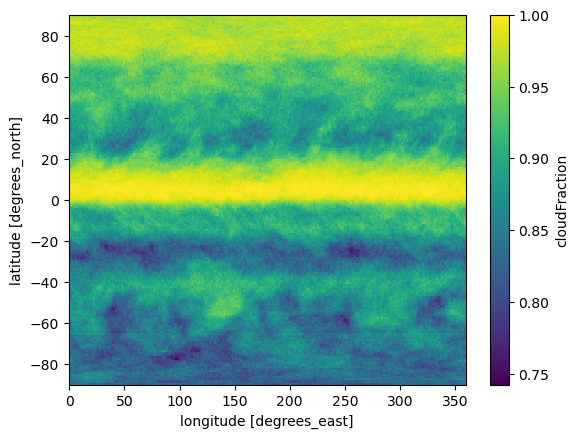

In [13]:
maxovr['c'].mean(dim='time').plot.pcolormesh()

In [17]:
.6*.5

0.3

In [21]:
import numpy as np



randovr = {}
for c, x in dses.items():
    data = x['cloudFraction']
    randovr[c] = 1 - np.cumprod(1 - data, axis=data.dims.index('level'))

# # Assuming you have cloudfraction data stored in a variable 'cloudfraction_data'
# # with dimensions (time, level, lat, lon)

# # Generate random overlap values for each level
# overlap_values = np.random.rand(cloudfraction_data.shape[1])

# # Multiply cloudfraction data by the overlap values at each level
# cloud_cover_data = cloudfraction_data * overlap_values

# # Sum the values across the level dimension to get total cloud cover
# total_cloud_cover = np.sum(cloud_cover_data, axis=1)

# # Now total_cloud_cover will have dimensions (time, lat, lon) representing total cloud cover values


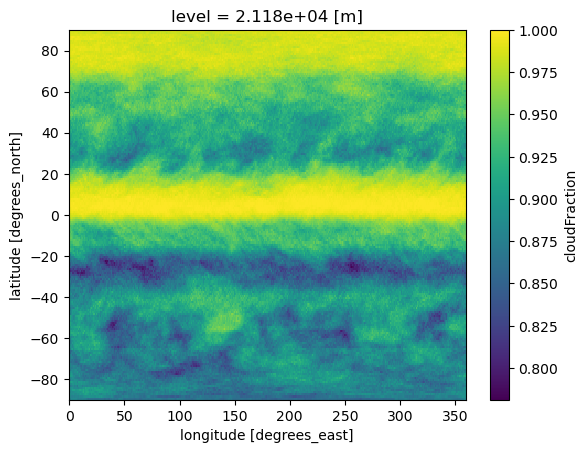

In [28]:
randovr['c'].isel(level=-1).mean(dim='time').plot.pcolormesh()
# randovr['c'].mean(dim='time').plot.pcolormesh()

In [29]:
rr = {c: randovr[c].isel(level=-1) for c in randovr}

In [31]:
for c, cf in rr.items():
    ofil = f'/glade/derecho/scratch/brianpm/aqua_sstmax10N_ASD_CFrandovr_{c}.nc'
    cf.to_netcdf(ofil)

In [32]:
for c, cf in maxovr.items():
    ofil = f'/glade/derecho/scratch/brianpm/aqua_sstmax10N_ASD_CFmaxovr_{c}.nc'
    cf.to_netcdf(ofil)